In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
# from tensorflow import keras
import tensorflow as tf

# %load_ext tensorboard
# import tensorboard
import os

In [2]:
from datetime import datetime
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

In [3]:
from random import seed

seed(36)

### Data Paths

In [4]:
BASE_DIR_PATH = '/Users/neilb/Documents/dsci_thesis/Datasets'
TRAIN_DATASET_FILE = os.path.join(BASE_DIR_PATH, 'train_set.csv')
VAL_DATASET_FILE = os.path.join(BASE_DIR_PATH, 'val_set.csv')
TEST_DATASET_FILE = os.path.join(BASE_DIR_PATH, 'test_set.csv')

In [5]:
train_df = pd.read_csv(TRAIN_DATASET_FILE)
train_df

,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,Waterlevel_Montalban,Discharge_Sto_Nino,Discharge_San_Jose,Cross_Section_Sto_Nino,Cross_Section_Montalban,Velocity_Sto_Nino,Velocity_Montalban,datetime,t,x,Date
0,0,0,0,0,0,11.95,20.52,15.963477,8.918747,788.70,615.6,0.020240,0.014488,2016-06-26 00:00:00,0.0,14420,2016-06-26
1,0,0,0,0,0,11.95,20.52,15.963477,8.918747,788.70,615.6,0.020240,0.014488,2016-06-26 01:00:00,3600.0,14420,2016-06-26
2,0,0,0,0,0,11.94,20.51,15.767735,8.829671,788.04,615.3,0.020009,0.014350,2016-06-26 02:00:00,7200.0,14420,2016-06-26
3,0,0,0,0,0,11.94,20.51,15.767735,8.829671,788.04,615.3,0.020009,0.014350,2016-06-26 03:00:00,10800.0,14420,2016-06-26
4,0,0,0,0,0,11.93,20.51,15.573927,8.829671,787.38,615.3,0.019779,0.014350,2016-06-26 04:00:00,14400.0,14420,2016-06-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,0,0,0,0,0,12.56,21.22,32.181268,17.920709,828.96,636.6,0.038821,0.028151,2017-07-23 19:00:00,154800.0,14420,2017-07-23
1892,0,0,0,0,0,12.53,21.22,31.158059,17.920709,826.98,636.6,0.037677,0.028151,2017-07-23 20:00:00,158400.0,14420,2017-07-23
1893,0,0,0,0,0,12.51,21.21,30.490564,17.744132,825.66,636.3,0.036929,0.027886,2017-07-23 21:00:00,162000.0,14420,2017-07-23
1894,0,0,0,0,0,12.49,21.21,29.834608,17.744132,824.34,636.3,0.036192,0.027886,2017-07-23 22:00:00,165600.0,14420,2017-07-23


In [6]:
val_df = pd.read_csv(VAL_DATASET_FILE)
val_df

,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,Waterlevel_Montalban,Discharge_Sto_Nino,Discharge_San_Jose,Cross_Section_Sto_Nino,Cross_Section_Montalban,Velocity_Sto_Nino,Velocity_Montalban,datetime,t,x,Date
0,0,0,0,0,0,12.47,21.32,29.190037,19.783987,823.02,639.6,0.035467,0.030932,2017-07-25 00:00:00,0.0,14420,2017-07-25
1,0,0,0,0,0,12.51,22.37,30.490564,55.264986,825.66,671.1,0.036929,0.082350,2017-07-25 01:00:00,3600.0,14420,2017-07-25
2,0,0,0,1,0,12.54,22.72,31.496180,77.481767,827.64,681.6,0.038055,0.113676,2017-07-25 02:00:00,7200.0,14420,2017-07-25
3,0,0,0,0,0,12.71,22.72,37.710339,77.481767,838.86,681.6,0.044954,0.113676,2017-07-25 03:00:00,10800.0,14420,2017-07-25
4,0,0,0,0,0,13.05,22.54,53.091118,65.140195,861.30,676.2,0.061641,0.096333,2017-07-25 04:00:00,14400.0,14420,2017-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0,0,0,0,0,12.81,21.74,41.802412,29.911716,845.46,652.2,0.049443,0.045863,2017-10-15 19:00:00,414000.0,14420,2017-10-15
788,0,0,0,0,0,12.81,21.72,41.802412,29.330881,845.46,651.6,0.049443,0.045014,2017-10-15 20:00:00,417600.0,14420,2017-10-15
789,0,0,0,0,0,12.79,21.70,40.956736,28.761110,844.14,651.0,0.048519,0.044180,2017-10-15 21:00:00,421200.0,14420,2017-10-15
790,0,0,0,0,0,12.77,21.68,40.124861,28.202195,842.82,650.4,0.047608,0.043361,2017-10-15 22:00:00,424800.0,14420,2017-10-15


In [7]:
test_df = pd.read_csv(TEST_DATASET_FILE)
test_df

,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,Waterlevel_Montalban,Discharge_Sto_Nino,Discharge_San_Jose,Cross_Section_Sto_Nino,Cross_Section_Montalban,Velocity_Sto_Nino,Velocity_Montalban,datetime,t,x,Date
0,0,0,0,0,0,12.74,21.67,38.902552,27.926745,840.84,650.1,0.046266,0.042958,2017-10-16 00:00:00,0.0,14420,2017-10-16
1,0,0,0,0,0,12.71,21.66,37.710339,27.653933,838.86,649.8,0.044954,0.042558,2017-10-16 01:00:00,3600.0,14420,2017-10-16
2,0,0,0,0,0,12.70,21.66,37.319525,27.653933,838.20,649.8,0.044523,0.042558,2017-10-16 02:00:00,7200.0,14420,2017-10-16
3,0,0,0,0,0,12.70,21.66,37.319525,27.653933,838.20,649.8,0.044523,0.042558,2017-10-16 03:00:00,10800.0,14420,2017-10-16
4,0,0,0,0,0,12.69,21.66,36.931973,27.653933,837.54,649.8,0.044096,0.042558,2017-10-16 04:00:00,14400.0,14420,2017-10-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,0,0,0,11.82,20.95,13.565535,13.707290,780.12,628.5,0.017389,0.021810,2017-02-24 19:00:00,414000.0,14420,2017-02-24
764,0,0,0,0,0,11.82,20.95,13.565535,13.707290,780.12,628.5,0.017389,0.021810,2017-02-24 20:00:00,417600.0,14420,2017-02-24
765,0,0,0,0,0,11.82,20.95,13.565535,13.707290,780.12,628.5,0.017389,0.021810,2017-02-24 21:00:00,421200.0,14420,2017-02-24
766,0,0,0,0,0,11.82,20.95,13.565535,13.707290,780.12,628.5,0.017389,0.021810,2017-02-24 22:00:00,424800.0,14420,2017-02-24


In [8]:
train_n = len(train_df)
val_n = len(val_df)
test_n = len(test_df)

In [9]:
train_df['friction_coeff'] = [0.033 for i in range(train_n)]
train_df['slope'] = [1/1500 for i in range(train_n)]
train_df['Montalban_x'] = [0 for i in range(train_n)]
train_df.head()

,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,Waterlevel_Montalban,Discharge_Sto_Nino,Discharge_San_Jose,Cross_Section_Sto_Nino,Cross_Section_Montalban,Velocity_Sto_Nino,Velocity_Montalban,datetime,t,x,Date,friction_coeff,slope,Montalban_x
0,0,0,0,0,0,11.95,20.52,15.963477,8.918747,788.70,615.6,0.020240,0.014488,2016-06-26 00:00:00,0.0,14420,2016-06-26,0.033,0.000667,0
1,0,0,0,0,0,11.95,20.52,15.963477,8.918747,788.70,615.6,0.020240,0.014488,2016-06-26 01:00:00,3600.0,14420,2016-06-26,0.033,0.000667,0
2,0,0,0,0,0,11.94,20.51,15.767735,8.829671,788.04,615.3,0.020009,0.014350,2016-06-26 02:00:00,7200.0,14420,2016-06-26,0.033,0.000667,0
3,0,0,0,0,0,11.94,20.51,15.767735,8.829671,788.04,615.3,0.020009,0.014350,2016-06-26 03:00:00,10800.0,14420,2016-06-26,0.033,0.000667,0
4,0,0,0,0,0,11.93,20.51,15.573927,8.829671,787.38,615.3,0.019779,0.014350,2016-06-26 04:00:00,14400.0,14420,2016-06-26,0.033,0.000667,0


In [10]:
# train_df['t'] = np.array(train_df['t']) / 3600
# train_df.head()

In [11]:
val_df['friction_coeff'] = [0.033 for i in range(val_n)]
val_df['slope'] = [1/1500 for i in range(val_n)]
val_df['Montalban_x'] = [0 for i in range(val_n)]
val_df.head()

,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,Waterlevel_Montalban,Discharge_Sto_Nino,Discharge_San_Jose,Cross_Section_Sto_Nino,Cross_Section_Montalban,Velocity_Sto_Nino,Velocity_Montalban,datetime,t,x,Date,friction_coeff,slope,Montalban_x
0,0,0,0,0,0,12.47,21.32,29.190037,19.783987,823.02,639.6,0.035467,0.030932,2017-07-25 00:00:00,0.0,14420,2017-07-25,0.033,0.000667,0
1,0,0,0,0,0,12.51,22.37,30.490564,55.264986,825.66,671.1,0.036929,0.082350,2017-07-25 01:00:00,3600.0,14420,2017-07-25,0.033,0.000667,0
2,0,0,0,1,0,12.54,22.72,31.496180,77.481767,827.64,681.6,0.038055,0.113676,2017-07-25 02:00:00,7200.0,14420,2017-07-25,0.033,0.000667,0
3,0,0,0,0,0,12.71,22.72,37.710339,77.481767,838.86,681.6,0.044954,0.113676,2017-07-25 03:00:00,10800.0,14420,2017-07-25,0.033,0.000667,0
4,0,0,0,0,0,13.05,22.54,53.091118,65.140195,861.30,676.2,0.061641,0.096333,2017-07-25 04:00:00,14400.0,14420,2017-07-25,0.033,0.000667,0


In [12]:
# val_df['t'] = np.array(val_df['t']) / 3600
# val_df.head()

In [13]:
test_df['friction_coeff'] = [0.033 for i in range(test_n)]
test_df['slope'] = [1/1500 for i in range(test_n)]
test_df['Montalban_x'] = [0 for i in range(test_n)]
test_df.head()

,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,Waterlevel_Montalban,Discharge_Sto_Nino,Discharge_San_Jose,Cross_Section_Sto_Nino,Cross_Section_Montalban,Velocity_Sto_Nino,Velocity_Montalban,datetime,t,x,Date,friction_coeff,slope,Montalban_x
0,0,0,0,0,0,12.74,21.67,38.902552,27.926745,840.84,650.1,0.046266,0.042958,2017-10-16 00:00:00,0.0,14420,2017-10-16,0.033,0.000667,0
1,0,0,0,0,0,12.71,21.66,37.710339,27.653933,838.86,649.8,0.044954,0.042558,2017-10-16 01:00:00,3600.0,14420,2017-10-16,0.033,0.000667,0
2,0,0,0,0,0,12.70,21.66,37.319525,27.653933,838.20,649.8,0.044523,0.042558,2017-10-16 02:00:00,7200.0,14420,2017-10-16,0.033,0.000667,0
3,0,0,0,0,0,12.70,21.66,37.319525,27.653933,838.20,649.8,0.044523,0.042558,2017-10-16 03:00:00,10800.0,14420,2017-10-16,0.033,0.000667,0
4,0,0,0,0,0,12.69,21.66,36.931973,27.653933,837.54,649.8,0.044096,0.042558,2017-10-16 04:00:00,14400.0,14420,2017-10-16,0.033,0.000667,0


In [14]:
# test_df['t'] = np.array(test_df['t']) / 3600
# test_df.head()

In [15]:
# X_train_Sto_Nino = np.array(train_df[['x','t', 'Discharge_Sto_Nino', 'friction_coeff', 'slope']].values.tolist())
# X_train_Montalban = np.array(train_df[['Montalban_x','t', 'Discharge_San_Jose', 'friction_coeff', 'slope']].values.tolist())
# X_train = np.concatenate([X_train_Sto_Nino, X_train_Montalban])

# X_val_Sto_Nino = np.array(val_df[['x','t', 'Discharge_Sto_Nino', 'friction_coeff', 'slope']].values.tolist())
# X_val_Montalban = np.array(val_df[['Montalban_x','t', 'Discharge_San_Jose', 'friction_coeff', 'slope']].values.tolist())
# X_val = np.concatenate([X_val_Sto_Nino, X_val_Montalban])

X_train = np.array(train_df[['x','t', 'Discharge_Sto_Nino', 'friction_coeff', 'slope']].values.tolist())
X_val = np.array(val_df[['x','t', 'Discharge_Sto_Nino', 'friction_coeff', 'slope']].values.tolist())

In [16]:
X_train

array([[1.44200000e+04, 0.00000000e+00, 1.59634766e+01, 3.30000000e-02,
        6.66666667e-04],
       [1.44200000e+04, 3.60000000e+03, 1.59634766e+01, 3.30000000e-02,
        6.66666667e-04],
       [1.44200000e+04, 7.20000000e+03, 1.57677352e+01, 3.30000000e-02,
        6.66666667e-04],
       ...,
       [1.44200000e+04, 1.62000000e+05, 3.04905643e+01, 3.30000000e-02,
        6.66666667e-04],
       [1.44200000e+04, 1.65600000e+05, 2.98346076e+01, 3.30000000e-02,
        6.66666667e-04],
       [1.44200000e+04, 1.69200000e+05, 2.91900373e+01, 3.30000000e-02,
        6.66666667e-04]])

In [17]:
# Y_train_Sto_Nino = np.array(train_df[['Velocity_Sto_Nino','Waterlevel_Sto_Nino']].values.tolist())
# Y_train_Montalban = np.array(train_df[['Velocity_Montalban','Waterlevel_Montalban']].values.tolist())
# Y_train = np.concatenate([Y_train_Sto_Nino, Y_train_Montalban])

# Y_val_Sto_Nino = np.array(val_df[['Velocity_Sto_Nino','Waterlevel_Sto_Nino']].values.tolist())
# Y_val_Montalban = np.array(val_df[['Velocity_Montalban','Waterlevel_Montalban']].values.tolist())
# Y_val = np.concatenate([Y_val_Sto_Nino, Y_val_Montalban])

Y_train = np.array(train_df[['Velocity_Sto_Nino','Waterlevel_Sto_Nino']].values.tolist())
Y_val = np.array(val_df[['Velocity_Sto_Nino','Waterlevel_Sto_Nino']].values.tolist())

In [18]:
Y_train

array([[ 0.02024024, 11.95      ],
       [ 0.02024024, 11.95      ],
       [ 0.0200088 , 11.94      ],
       ...,
       [ 0.03692872, 12.51      ],
       [ 0.03619211, 12.49      ],
       [ 0.03546698, 12.47      ]])

### Params

In [19]:
epochs = 15

### Model with grid search

In [20]:
best_val_loss = np.inf
best_model = -1 

In [21]:
results = []
layer_1_neurons = [16,32,64]   ######## Check the number of neurons ########
layer_2_neurons = [16,32,64]  ######## Check the number of neurons ########
layer_3_neurons = [16,32,64]  ######## Check the number of neurons ########
reg_consts = [0]

### Defining evaluation metrics

In [22]:
def r_square(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.square(K.sum(xm * ym))
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = (x_square_sum * y_square_sum) + K.epsilon()
    
    r = r_num / r_den
    return r

In [23]:
def NSE(y_true, y_pred):

    y_pred = K.flatten(y_pred)
    y_true = K.flatten(y_true)

    
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [24]:
#PDE Loss Function
def custom_loss(grads_inputs):
    du_dx, du_dt, dh_dx, fric_coeff, slope = grads_inputs[:,0], grads_inputs[:,1], grads_inputs[:,2], grads_inputs[:,3], grads_inputs[:,4]
    g = K.constant(9.8)
    # Create a loss function that adds the MSE loss to the mean of all squared activations of a specific layer
    def loss(y_true,y_pred):
        loss_saint_venant = du_dt + y_pred[:,0] * du_dx + g*dh_dx + g*slope + g*K.square(fric_coeff) * K.square(y_true[:,0])/(K.pow(y_true[:,1], 4/3) + K.epsilon())
        l = K.mean(K.square(loss_saint_venant))

        return l+ K.sum(K.mean(K.square(y_pred - y_true), axis=0))
   
    # Return a function
    return loss

### Defining model

In [25]:
for reg in reg_consts:
    for n1 in layer_1_neurons:
        for n2 in layer_2_neurons:
            for n3 in layer_3_neurons:
                print(n1,n2,n3,reg)
                K.clear_session()
                model = Sequential()
                #model.add(Dense(n1, activation = 'relu', input_shape = (1,)))
                model.add(Dense(n1, activation = 'relu', kernel_regularizer=l2(reg),input_shape = (5,)))
                model.add(Dense(n2, activation = 'relu', kernel_regularizer=l2(reg)))
                model.add(Dense(n3, activation = 'relu', kernel_regularizer=l2(reg)))

                model.add(Dense(2))
                grads_u = K.gradients(model.output[:,0], model.input)[0]
                grads_h = K.gradients(model.output[:,1], model.input)[0]


                du_dx, du_dt, dh_dx = grads_u[:,0],grads_u[:,1],grads_h[:,0]
                calc_grads_inputs = K.stack((du_dx, du_dt, dh_dx, model.input[:,3],model.input[:,4]), axis=1)
                # model.summary()
                #Compile the model
                model.compile(optimizer = 'adam', loss = [custom_loss(calc_grads_inputs)], metrics=['mape', 'mae', 'mse',NSE, r_square])
                #fit the model
                early_stopping_monitor = EarlyStopping(patience = 2, verbose=False)
                history = model.fit(X_train,Y_train, epochs=epochs, batch_size=128, validation_data=(X_val,Y_val), callbacks=[early_stopping_monitor])

                # Saving results
                val_loss = history.history['val_loss'][-1]
                val_mae = history.history['val_mae'][-1]
                val_mse = history.history['val_mse'][-1]
                val_mape = history.history['val_mape'][-1]
                val_nse = history.history['val_NSE'][-1]
                val_r_square = history.history['val_r_square'][-1]

                results.append({
                    'n1':n1,
                    'n2':n2,
                    'n3':n3, 
                    'epochs':len(history.history['val_loss']), 
                    'reg':reg,
                    'val_r2':val_r_square, 
                    'val_nse':val_nse, 
                    'val_mse':val_mse, 
                    'val_loss':val_loss,
                    'val_mae':val_mae, 
                    'val_mape':val_mape
                })
                
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    best_model = model
                    best_n1 = n1
                    best_n2 = n2
                    best_n3 = n3
                    best_reg = reg
                    best_history = history
                    #model.save(save_model_path)
                    #results.to_csv(save_results_path)
                    
#results.to_csv(save_results_path)

16 16 16 0
Train on 1896 samples, validate on 792 samples
Epoch 1/15
1896/1896 [==============================] - 1s 354us/sample - loss: 10388223241.7215 - mape: 87426176.0000 - mae: 46927.5586 - mse: 5110617600.0000 - NSE: -126364296.0000 - r_square: 0.0038 - val_loss: 5355150222.2222 - val_mape: 55151120.0000 - val_mae: 38278.4844 - val_mse: 2664611072.0000 - val_NSE: -64452736.0000 - val_r_square: 0.0021
Epoch 2/15
 128/1896 [=>............................] - ETA: 0s - loss: 5685504000.0000 - mape: 62677132.0000 - mae: 38096.0234 - mse: 2828965888.0000 - NSE: -69843216.0000 - r_square: 0.0065

C:\Users\neilb\anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1896/1896 [==============================] - 0s 30us/sample - loss: 3625878327.0886 - mape: 50074116.0000 - mae: 30266.8926 - mse: 1808693888.0000 - NSE: -44842184.0000 - r_square: 0.0104 - val_loss: 1770680154.5051 - val_mape: 29552128.0000 - val_mae: 23667.5918 - val_mse: 884894464.0000 - val_NSE: -20656076.0000 - val_r_square: 0.0050
Epoch 3/15
1896/1896 [==============================] - 0s 20us/sample - loss: 1097976917.3333 - mape: 24230846.0000 - mae: 17430.2793 - mse: 548117952.0000 - NSE: -13512325.0000 - r_square: 0.0275 - val_loss: 395388239.1919 - val_mape: 11116201.0000 - val_mae: 11632.1406 - val_mse: 197076144.0000 - val_NSE: -4612207.0000 - val_r_square: 0.0130
Epoch 4/15
1896/1896 [==============================] - 0s 18us/sample - loss: 185056259.7131 - mape: 6759955.0000 - mae: 6910.4980 - mse: 92366536.0000 - NSE: -2274364.2500 - r_square: 0.0619 - val_loss: 28205742.6869 - val_mape: 1376213.6250 - val_mae: 2758.3225 - val_mse: 14101064.0000 - val_NSE: -337007.9375 

Epoch 8/15
1896/1896 [==============================] - 0s 17us/sample - loss: 84992.7116 - mape: 290497.1250 - mae: 162.7643 - mse: 42447.1406 - NSE: -1055.4069 - r_square: 0.0101 - val_loss: 44520.3649 - val_mape: 177069.7500 - val_mae: 118.4970 - val_mse: 22235.3613 - val_NSE: -537.4435 - val_r_square: 0.0062
Epoch 9/15
1896/1896 [==============================] - 0s 17us/sample - loss: 40450.4655 - mape: 199998.2969 - mae: 108.1191 - mse: 20198.5117 - NSE: -500.3983 - r_square: 0.0043 - val_loss: 25635.2250 - val_mape: 118224.5078 - val_mae: 86.3889 - val_mse: 12796.7451 - val_NSE: -289.3044 - val_r_square: 5.1037e-04
Epoch 10/15
1896/1896 [==============================] - 0s 17us/sample - loss: 24299.0173 - mape: 135595.9062 - mae: 71.5758 - mse: 12125.1152 - NSE: -299.4238 - r_square: 0.0042 - val_loss: 16940.5348 - val_mape: 82189.5391 - val_mae: 55.3518 - val_mse: 8450.5137 - val_NSE: -223.5493 - val_r_square: 0.0035
Epoch 11/15
1896/1896 [==============================] - 0s 

Epoch 4/15
1896/1896 [==============================] - 0s 33us/sample - loss: 3924790.0074 - mape: 1605844.7500 - mae: 999.5667 - mse: 1957886.7500 - NSE: -48179.0703 - r_square: 0.0473 - val_loss: 904476.1572 - val_mape: 697264.7500 - val_mae: 550.4330 - val_mse: 451677.7812 - val_NSE: -10471.1572 - val_r_square: 0.0229
Epoch 5/15
1896/1896 [==============================] - 0s 22us/sample - loss: 933640.7532 - mape: 518582.5938 - mae: 470.9780 - mse: 466507.4688 - NSE: -11526.5010 - r_square: 0.0416 - val_loss: 675635.7203 - val_mape: 129254.1250 - val_mae: 392.1491 - val_mse: 337808.2500 - val_NSE: -7953.2021 - val_r_square: 0.0542
Epoch 6/15
1896/1896 [==============================] - 0s 27us/sample - loss: 263081.3933 - mape: 276710.0938 - mae: 239.1061 - mse: 131499.9531 - NSE: -3259.9446 - r_square: 0.0245 - val_loss: 149745.7958 - val_mape: 299713.5312 - val_mae: 205.3524 - val_mse: 74810.5625 - val_NSE: -1726.7971 - val_r_square: 0.0178
Epoch 7/15
1896/1896 [================

Epoch 15/15
1896/1896 [==============================] - 0s 22us/sample - loss: 21267.5757 - mape: 81144.0312 - mae: 76.4556 - mse: 10632.0283 - NSE: -263.7332 - r_square: 0.0458 - val_loss: 16528.3889 - val_mape: 60742.2070 - val_mae: 68.6128 - val_mse: 8263.3789 - val_NSE: -192.0975 - val_r_square: 0.0661
16 64 32 0
Train on 1896 samples, validate on 792 samples
Epoch 1/15
1896/1896 [==============================] - 0s 247us/sample - loss: 77760385.8397 - mape: 2891216.0000 - mae: 3816.7915 - mse: 38867980.0000 - NSE: -951973.5625 - r_square: 0.0642 - val_loss: 26032114.1010 - val_mape: 3109449.2500 - val_mae: 2789.3440 - val_mse: 13007037.0000 - val_NSE: -324879.0938 - val_r_square: 0.0101
Epoch 2/15
1896/1896 [==============================] - 0s 26us/sample - loss: 9994695.4241 - mape: 2296335.5000 - mae: 1539.5303 - mse: 4994988.5000 - NSE: -123837.0938 - r_square: 0.0136 - val_loss: 5662228.9697 - val_mape: 1413728.6250 - val_mae: 1542.1620 - val_mse: 2830354.7500 - val_NSE: -6

Epoch 9/15
1896/1896 [==============================] - 0s 19us/sample - loss: 104696.6694 - mape: 290900.7500 - mae: 173.9147 - mse: 52259.9023 - NSE: -1298.5701 - r_square: 0.0154 - val_loss: 59187.0407 - val_mape: 182651.6719 - val_mae: 136.1046 - val_mse: 29554.4160 - val_NSE: -682.1660 - val_r_square: 0.0412
Epoch 10/15
1896/1896 [==============================] - 0s 25us/sample - loss: 73696.5388 - mape: 257434.2812 - mae: 144.1486 - mse: 36780.0742 - NSE: -911.7227 - r_square: 0.0089 - val_loss: 49878.6276 - val_mape: 170837.2969 - val_mae: 129.1670 - val_mse: 24918.6289 - val_NSE: -584.0155 - val_r_square: 0.0325
Epoch 11/15
1896/1896 [==============================] - 0s 20us/sample - loss: 48384.3353 - mape: 187025.4688 - mae: 125.8727 - mse: 24161.0840 - NSE: -597.5933 - r_square: 0.0415 - val_loss: 21517.2803 - val_mape: 96454.7188 - val_mae: 89.8339 - val_mse: 10753.7100 - val_NSE: -252.3628 - val_r_square: 0.0130
Epoch 12/15
1896/1896 [==============================] - 0s

1896/1896 [==============================] - 1s 280us/sample - loss: 122811166.7342 - mape: 8458751.0000 - mae: 4473.1504 - mse: 59826400.0000 - NSE: -1481735.6250 - r_square: 0.0068 - val_loss: 44447735.4343 - val_mape: 4811152.0000 - val_mae: 3127.8252 - val_mse: 22063798.0000 - val_NSE: -510811.2812 - val_r_square: 7.1325e-04
Epoch 2/15
1896/1896 [==============================] - 0s 21us/sample - loss: 13521883.3629 - mape: 2848591.7500 - mae: 1452.1652 - mse: 6713182.5000 - NSE: -166329.4375 - r_square: 0.0089 - val_loss: 9303471.6465 - val_mape: 2639140.2500 - val_mae: 1486.8550 - val_mse: 4623747.0000 - val_NSE: -106485.8984 - val_r_square: 0.0012
Epoch 3/15
1896/1896 [==============================] - 0s 21us/sample - loss: 3304374.6717 - mape: 1616049.5000 - mae: 800.8410 - mse: 1645319.8750 - NSE: -40597.1875 - r_square: 0.0041 - val_loss: 714911.6465 - val_mape: 587451.5000 - val_mae: 520.8356 - val_mse: 357338.5938 - val_NSE: -8135.9634 - val_r_square: 0.0565
Epoch 4/15
189

32 64 32 0
Train on 1896 samples, validate on 792 samples
Epoch 1/15
1896/1896 [==============================] - 0s 178us/sample - loss: 91786730.0422 - mape: 4982188.5000 - mae: 4281.8149 - mse: 45879032.0000 - NSE: -1136004.6250 - r_square: 0.0449 - val_loss: 32192676.2828 - val_mape: 3466523.5000 - val_mae: 3180.2314 - val_mse: 16066700.0000 - val_NSE: -392112.1562 - val_r_square: 0.0107
Epoch 2/15
1896/1896 [==============================] - 0s 24us/sample - loss: 9837524.1614 - mape: 2019534.5000 - mae: 1506.7340 - mse: 4911293.0000 - NSE: -122156.7969 - r_square: 0.0237 - val_loss: 8153172.0404 - val_mape: 1891628.6250 - val_mae: 1777.4762 - val_mse: 4074066.5000 - val_NSE: -94346.2891 - val_r_square: 0.0093
Epoch 3/15
1896/1896 [==============================] - 0s 24us/sample - loss: 2542404.4409 - mape: 993703.5000 - mae: 797.7842 - mse: 1270164.7500 - NSE: -31628.3027 - r_square: 0.0296 - val_loss: 1725849.5745 - val_mape: 679467.0625 - val_mae: 700.7457 - val_mse: 861786.68

Epoch 12/15
1896/1896 [==============================] - 0s 26us/sample - loss: 10930.2333 - mape: 89339.8359 - mae: 57.9230 - mse: 5463.7637 - NSE: -134.4535 - r_square: 0.0084 - val_loss: 7869.0204 - val_mape: 67106.6953 - val_mae: 50.8116 - val_mse: 3933.6038 - val_NSE: -87.5340 - val_r_square: 0.0216
Epoch 13/15
1896/1896 [==============================] - 0s 59us/sample - loss: 8639.6286 - mape: 79622.7266 - mae: 51.9617 - mse: 4318.8359 - NSE: -106.1032 - r_square: 0.0045 - val_loss: 6376.5794 - val_mape: 60483.5508 - val_mae: 45.7992 - val_mse: 3187.6089 - val_NSE: -72.9027 - val_r_square: 0.0107
Epoch 14/15
1896/1896 [==============================] - 0s 49us/sample - loss: 7430.7547 - mape: 72303.5078 - mae: 47.9842 - mse: 3714.6021 - NSE: -91.2598 - r_square: 0.0059 - val_loss: 5923.5154 - val_mape: 56899.4766 - val_mae: 44.4268 - val_mse: 2961.1877 - val_NSE: -69.4045 - val_r_square: 0.0114
Epoch 15/15
1896/1896 [==============================] - 0s 30us/sample - loss: 6543.

Epoch 8/15
1896/1896 [==============================] - 0s 29us/sample - loss: 1865.2307 - mape: 26487.3223 - mae: 15.2790 - mse: 932.3361 - NSE: -22.1639 - r_square: 0.0085 - val_loss: 1455.2024 - val_mape: 16794.7949 - val_mae: 13.3384 - val_mse: 727.4066 - val_NSE: -17.1375 - val_r_square: 0.0959
Epoch 9/15
1896/1896 [==============================] - 0s 34us/sample - loss: 1420.9777 - mape: 21688.0762 - mae: 12.6819 - mse: 710.2944 - NSE: -16.6552 - r_square: 0.0122 - val_loss: 1181.7116 - val_mape: 15255.4004 - val_mae: 13.2322 - val_mse: 590.7264 - val_NSE: -12.8256 - val_r_square: 0.1297
Epoch 10/15
1896/1896 [==============================] - 0s 41us/sample - loss: 1070.3670 - mape: 18881.0371 - mae: 10.9761 - mse: 535.0642 - NSE: -12.1955 - r_square: 0.0163 - val_loss: 900.3394 - val_mape: 13866.1602 - val_mae: 11.6511 - val_mse: 450.0943 - val_NSE: -9.9686 - val_r_square: 0.1382
Epoch 11/15
1896/1896 [==============================] - 0s 37us/sample - loss: 794.8207 - mape: 1

1896/1896 [==============================] - 0s 22us/sample - loss: 1599.7299 - mape: 36657.8125 - mae: 20.3143 - mse: 799.6519 - NSE: -18.8906 - r_square: 0.0019 - val_loss: 1328.6735 - val_mape: 28424.4648 - val_mae: 18.2750 - val_mse: 664.1955 - val_NSE: -15.2206 - val_r_square: 0.0113
64 32 64 0
Train on 1896 samples, validate on 792 samples
Epoch 1/15
1896/1896 [==============================] - 0s 180us/sample - loss: 81422976.1139 - mape: 5915345.5000 - mae: 4049.8445 - mse: 40556328.0000 - NSE: -995437.8125 - r_square: 0.0332 - val_loss: 1978829.5657 - val_mape: 603863.3750 - val_mae: 706.9138 - val_mse: 988302.8750 - val_NSE: -23580.5645 - val_r_square: 0.0177
Epoch 2/15
1896/1896 [==============================] - 0s 32us/sample - loss: 5271190.0105 - mape: 1885057.8750 - mae: 1315.6113 - mse: 2626549.2500 - NSE: -64676.3555 - r_square: 0.0402 - val_loss: 1970945.8106 - val_mape: 930691.8125 - val_mae: 746.8720 - val_mse: 982155.0625 - val_NSE: -24681.2129 - val_r_square: 0.0

1896/1896 [==============================] - 0s 24us/sample - loss: 18574.6951 - mape: 82171.2656 - mae: 75.1755 - mse: 9285.6699 - NSE: -228.5859 - r_square: 0.0127 - val_loss: 9753.7023 - val_mape: 48551.7578 - val_mae: 57.5094 - val_mse: 4875.4062 - val_NSE: -109.9040 - val_r_square: 0.0532
Epoch 8/15
1896/1896 [==============================] - 0s 24us/sample - loss: 10162.3506 - mape: 57260.0234 - mae: 55.5475 - mse: 5080.4497 - NSE: -125.1726 - r_square: 0.0095 - val_loss: 7307.1778 - val_mape: 40493.0898 - val_mae: 50.1553 - val_mse: 3652.8914 - val_NSE: -85.1751 - val_r_square: 0.1023
Epoch 9/15
1896/1896 [==============================] - 0s 25us/sample - loss: 7349.8981 - mape: 47563.1367 - mae: 47.5953 - mse: 3674.5513 - NSE: -90.1413 - r_square: 0.0070 - val_loss: 5124.5459 - val_mape: 29586.6777 - val_mae: 40.4511 - val_mse: 2561.8594 - val_NSE: -56.9752 - val_r_square: 0.0724
Epoch 10/15
1896/1896 [==============================] - 0s 25us/sample - loss: 5641.5953 - mape:

### Model summary

In [26]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2370 (9.26 KB)
Trainable params: 2370 (9.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Loss vs Epcohs Visualization

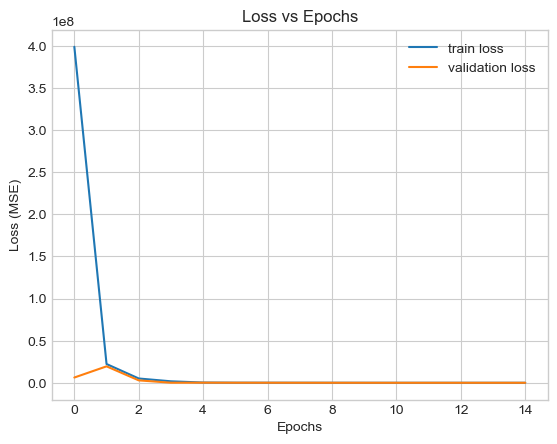

In [27]:
train_loss = best_history.history['loss']
val_loss = best_history.history['val_loss']    
plt.style.use('seaborn-whitegrid')
ax = plt.axes()
plt.plot(np.arange(len(train_loss)),train_loss, label ='train loss')
plt.plot(np.arange(len(val_loss)),val_loss, label ='validation loss')
plt.legend()
# plt.xticks(test['Time'].tolist()[::30], rotation = 45)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs Epochs')
plt.show()
#plt.savefig('/Users/ge72vep/Desktop/thesis/results/physics_loss_15_5_15.png', dpi=800)  ######## Check the data path ######## 

In [28]:
best_history.history['loss']

[399042469.6708861,
 22281516.552742615,
 5094891.411392405,
 1751912.3192246836,
 287082.59084915614,
 102055.39599815401,
 76872.16656777426,
 55368.49330828059,
 35218.641490308546,
 14284.80790768394,
 4374.52132006939,
 1153.5000538242516,
 541.1702619464086,
 304.17886210896296,
 162.22897383935342]

In [29]:
best_history.history['val_loss']

[6242975.424242424,
 19523083.111111112,
 2862702.025252525,
 88315.21283143939,
 139817.65546085857,
 74946.24558080808,
 59243.79450757576,
 34378.75895675505,
 16403.13208254419,
 7768.554677635732,
 1689.9304692432133,
 599.14283829506,
 318.13559877029576,
 157.86403609767103,
 94.72228017479482]

In [30]:
results[13]

{'n1': 32,
 'n2': 32,
 'n3': 32,
 'epochs': 15,
 'reg': 0,
 'val_r2': 0.025215651839971542,
 'val_nse': -0.12078994512557983,
 'val_mse': 47.353885650634766,
 'val_loss': 94.72228017479482,
 'val_mae': 4.4538044929504395,
 'val_mape': 4896.14111328125}